### 1. Libraries Import

In [39]:
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator


### 2. Getting the data from directory

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install patool #extracting file .zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 2.4 MB/s eta 0:00:00


In [5]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Alzheimer_MRI_Dataset.zip")

INFO patool: Extracting /content/drive/MyDrive/Alzheimer_MRI_Dataset.zip ...
INFO:patool:Extracting /content/drive/MyDrive/Alzheimer_MRI_Dataset.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_zb8ily4y -- /content/drive/MyDrive/Alzheimer_MRI_Dataset.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_zb8ily4y -- /content/drive/MyDrive/Alzheimer_MRI_Dataset.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/drive/MyDrive/Alzheimer_MRI_Dataset.zip extracted to `Alzheimer_MRI_Dataset' (multiple files in root).
INFO:patool:... /content/drive/MyDrive/Alzheimer_MRI_Dataset.zip extracted to `Alzheimer_MRI_Dataset' (multiple files in root).


'Alzheimer_MRI_Dataset'

In [6]:
file_path = '/content/Alzheimer_MRI_Dataset/OriginalDataset'
data_dir = pathlib.Path(file_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['MildDemented' 'ModerateDemented' 'NonDemented' 'VeryMildDemented']


### 3. Visualizing random images with labels

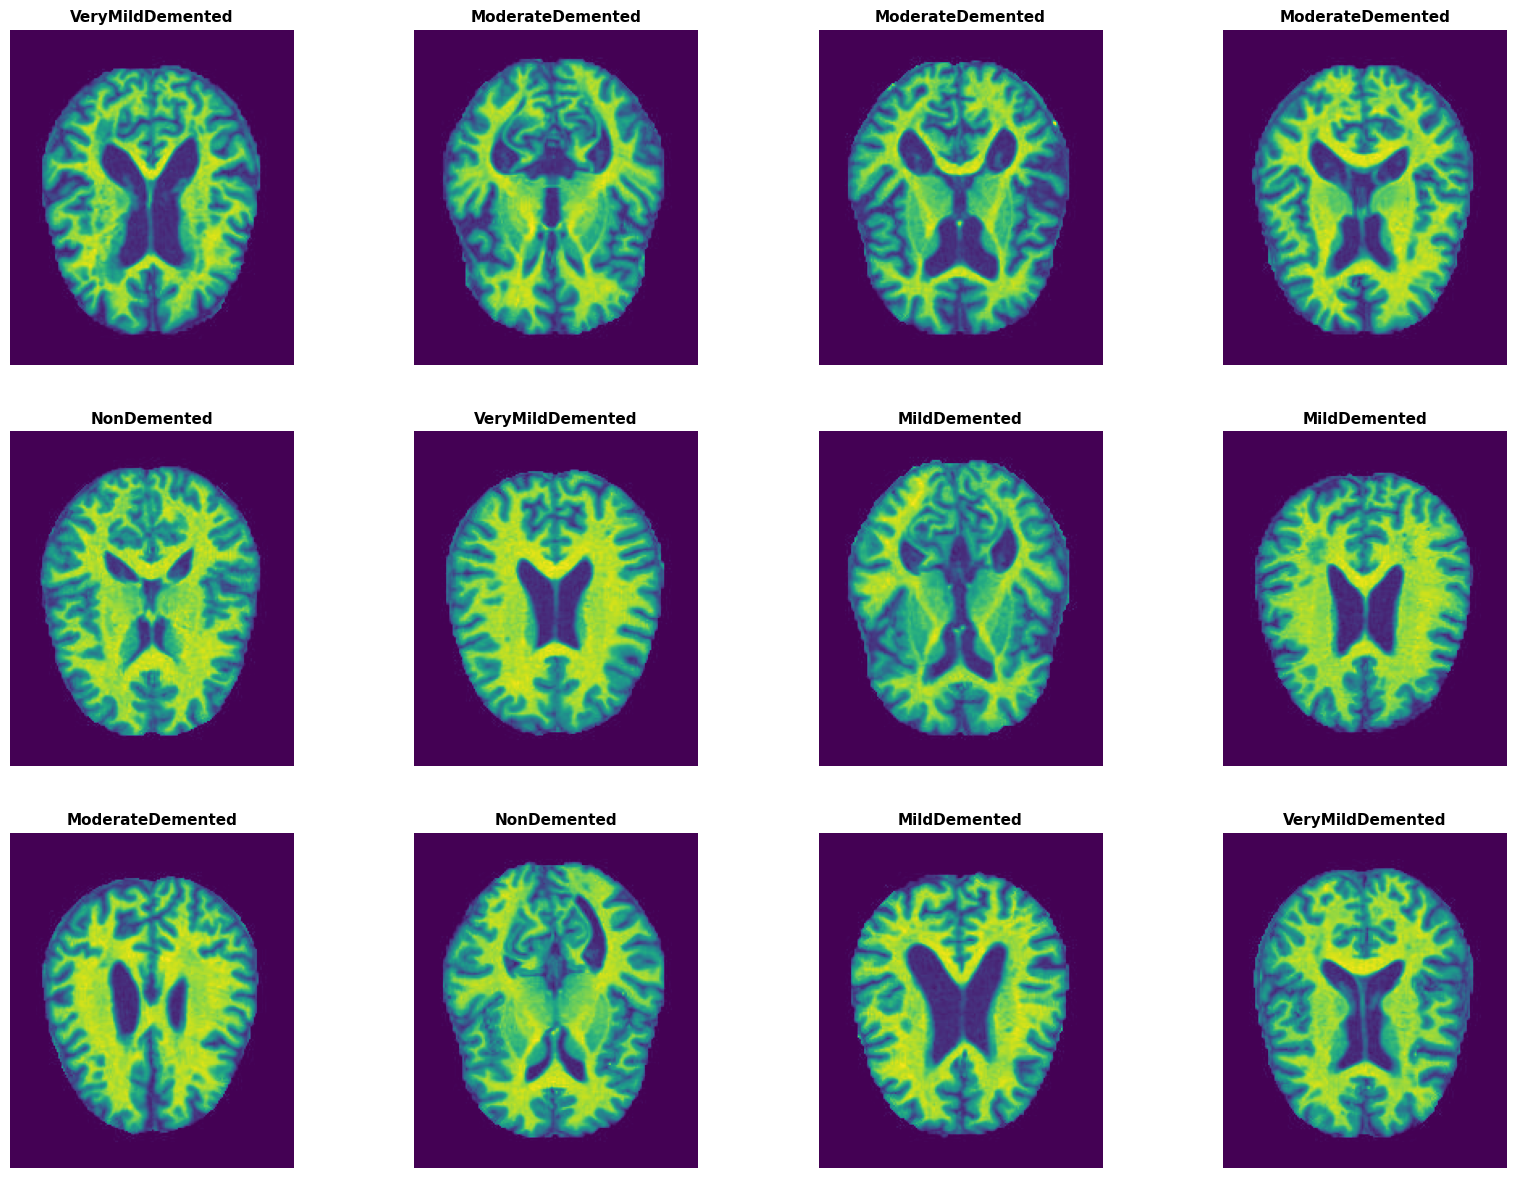

In [44]:
plt.figure(figsize=(20, 20))
for i in range(12):
    ax = plt.subplot(4, 4, i+1)
    random_class = random.randint(0, 3)
    folder_path = file_path + '/' + class_names[random_class]
    random_image_path = folder_path + '/' + (random.sample(os.listdir(folder_path), 1)[0])
    image = plt.imread(random_image_path)
    plt.axis('off')
    plt.title(class_names[random_class], fontsize = 11, fontweight = 'bold')
    plt.imshow(image)

### 4. Preparing the dataset

In [34]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

data_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = 1,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'training'
)

data_validation = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed = 1,
    image_size = IMG_SIZE,
    batch_size = BATCH_SIZE,
    validation_split = 0.2,
    subset = 'validation'
)


Found 6400 files belonging to 4 classes.
Using 5120 files for training.
Found 6400 files belonging to 4 classes.
Using 1280 files for validation.


### 5. Create the model

In [18]:
INPUT_SHAPE = IMG_SIZE + (3,)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Rescaling(scale=1./255, input_shape=INPUT_SHAPE))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Dropout(0.20))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))

model.add(tf.keras.layers.Dense(4, activation = 'softmax'))#  4 c'est le nbre de classes

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)       

### 6. Training the model

In [20]:
early_stop = EarlyStopping(monitor='val_accuracy',patience=3)
history = model.fit(data_train, epochs = 10, validation_data=data_validation, verbose=1,callbacks=[early_stop])

Epoch 1/10
160/160 [==============================] - 112s 695ms/step - loss: 0.9062 - accuracy: 0.5766 - val_loss: 0.8858 - val_accuracy: 0.5852
Epoch 2/10
160/160 [==============================] - 97s 607ms/step - loss: 0.7340 - accuracy: 0.6748 - val_loss: 0.7695 - val_accuracy: 0.6477
Epoch 3/10
160/160 [==============================] - 97s 608ms/step - loss: 0.5135 - accuracy: 0.7822 - val_loss: 0.4411 - val_accuracy: 0.8148
Epoch 4/10
160/160 [==============================] - 127s 794ms/step - loss: 0.3102 - accuracy: 0.8771 - val_loss: 0.2727 - val_accuracy: 0.9031
Epoch 5/10
160/160 [==============================] - 106s 664ms/step - loss: 0.1867 - accuracy: 0.9334 - val_loss: 0.2043 - val_accuracy: 0.9258
Epoch 6/10
160/160 [==============================] - 99s 616ms/step - loss: 0.1300 - accuracy: 0.9535 - val_loss: 0.1569 - val_accuracy: 0.9453
Epoch 7/10
160/160 [==============================] - 99s 622ms/step - loss: 0.0936 - accuracy: 0.9688 - val_loss: 0.1228 - val

### 7. Save Model


In [21]:
model.save('Alzheimer.model.keras')
model.save('Alzheimer.model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 8. Model evaluation

In [22]:
model_evaluate = model.evaluate(data_validation)
print("Accuracy: %", "{:.2f}".format(model_evaluate[1]*100))
print("Loss: %", "{:.2f}".format(model_evaluate[0]*100))

40/40 [==============================] - 9s 225ms/step - loss: 0.0683 - accuracy: 0.9773
Accuracy: % 97.73
Loss: % 6.83


[]

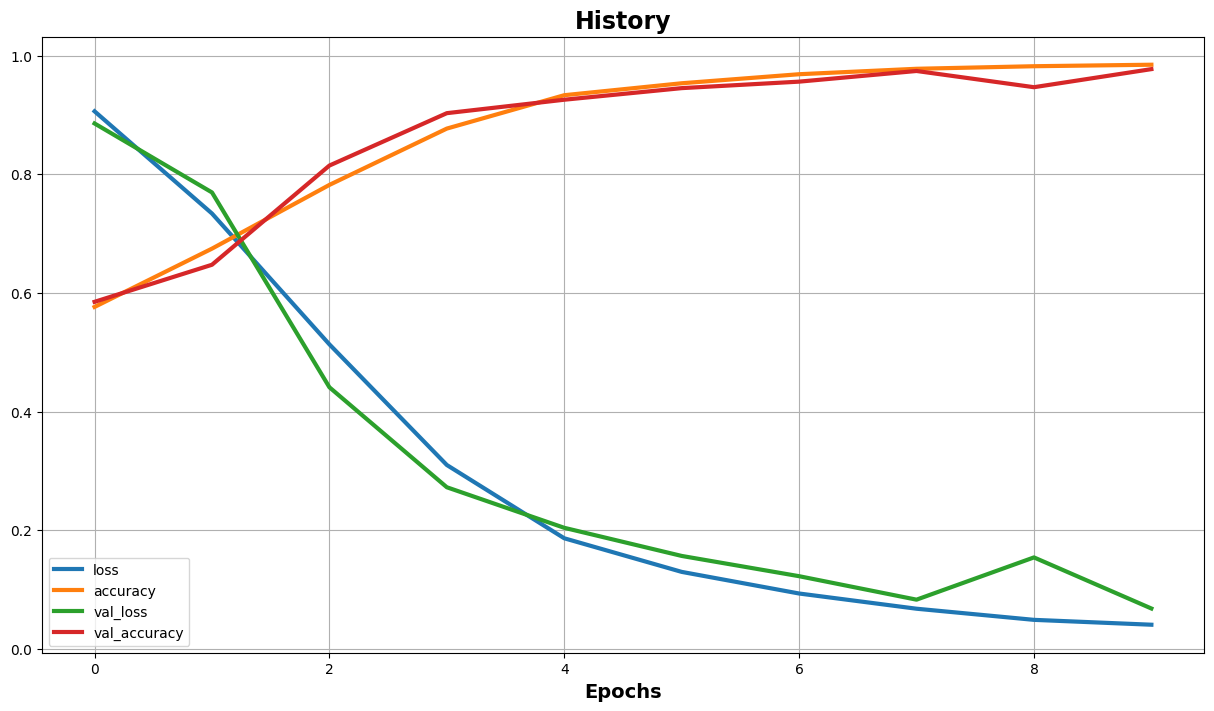

In [47]:
df = pd.DataFrame(history.history)
ax = df.plot(figsize=(15,8), lw=3, grid='on')
ax.set_title('History', fontsize=17, fontweight='bold')
ax.set_xlabel('Epochs', fontsize=14, fontweight='bold')
ax.plot()

1/1 [==============================] - 0s 70ms/step


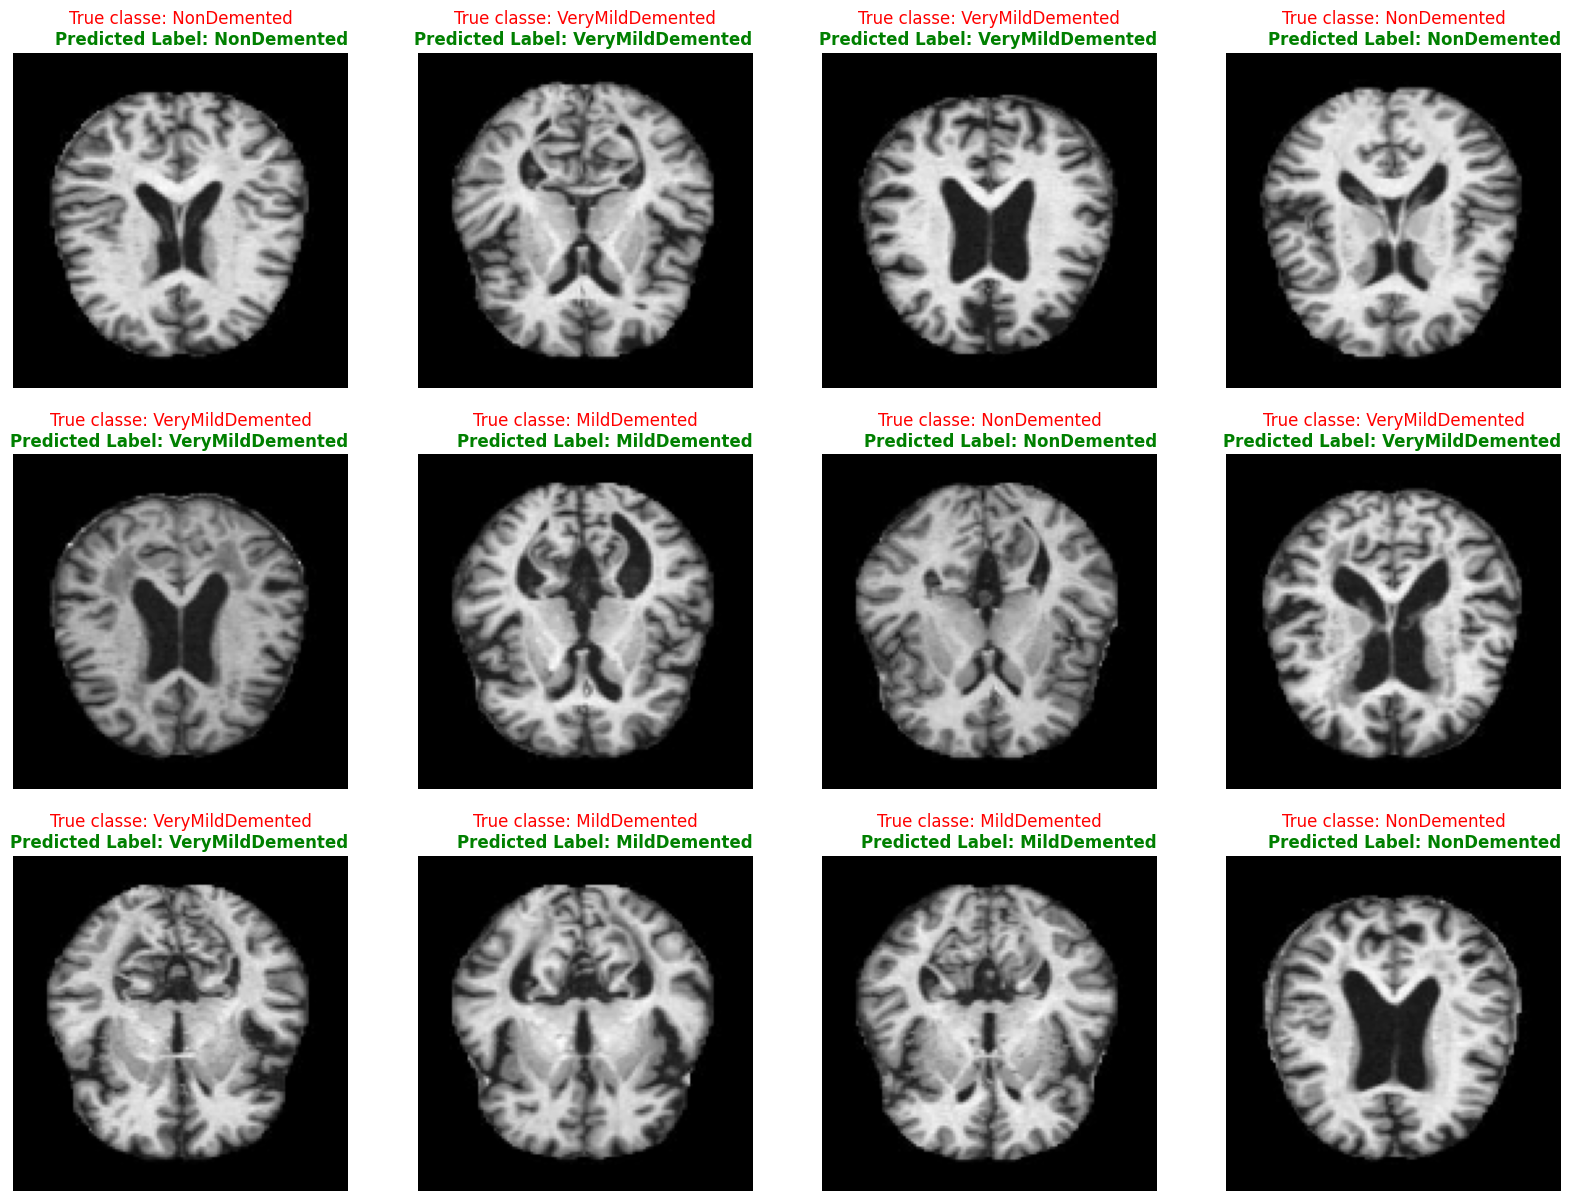

In [31]:
plt.figure(figsize=(20, 20))
for image, label in data_validation.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i+1)
        img = image[i].numpy().astype("uint8")
        img = tf.expand_dims(img, axis=0)
        predicted_class = np.argmax(model.predict(img))
        plt.axis('off')
        plt.title("Predicted Label: " + class_names[predicted_class], fontsize=12, fontweight='bold', color='green', loc='right')
        plt.title("True classe: " + class_names[label[i]]+'\n', fontsize=12,color='red', loc='center')
        plt.imshow(image[i].numpy().astype("uint8"))

### 9. Load Model



In [32]:
model=tf.keras.models.load_model('Alzheimer.model.keras')

### 9. Testing Model with External Image


1/1 [==============================] - 0s 37ms/step
[[0.00652105 0.02017162 0.94302255 0.03028477]]
Classe prédite : NonDemented


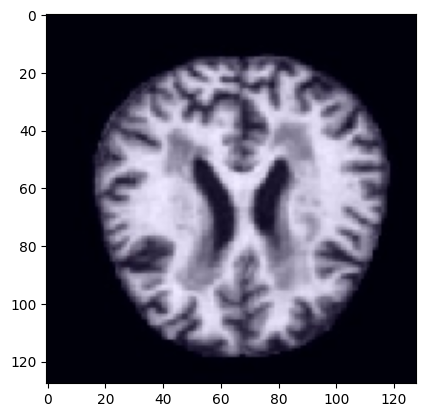

In [42]:

img = image.load_img("testg.jpg",target_size=(128,128))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)
print("Prediction :",output)


predicted_class_index = np.argmax(output)  # Obtenez l'indice de classe prédit
predicted_class_name = class_names[predicted_class_index]

print("Classe prédite :", predicted_class_name)